# Import Required Libraries
Import the necessary libraries, including geopandas and matplotlib.

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import folium
import ipywidgets as widgets
from IPython.display import display


# Load Shapefile
Load the .shp file using geopandas to create a GeoDataFrame.

In [17]:
#Shapefile
shapefile_path = "Counties.shp"  # Replace with your actual .shp file path
gdf = gpd.read_file(shapefile_path)

# Display the first few rows of the GeoDataFrame to verify it loaded correctly
gdf.head()

,COUNTYNBR,ENTITYNBR,ENTITYYR,NAME,FIPS,STATEPLANE,POP_LASTCE,POP_CURRES,GlobalID,FIPS_STR,COLOR4,geometry
0,03,2.010031e+09,2010.0,CACHE,5.0,North,133154,140173,ad3015be-b3c9-4316-b8dc-03afbb56b443,49005,2,"POLYGON ((-12485167.954 5160638.807, -12484924..."
1,07,2.010071e+09,2010.0,DUCHESNE,13.0,Central,19596,20161,7f6252b7-137f-4f7e-a19a-03c702111509,49013,4,"POLYGON ((-12273167.189 4987644.315, -12273053..."
2,06,2.010061e+09,2010.0,DAVIS,11.0,North,362679,369948,214e29a1-cc25-4867-9148-2817db623088,49011,3,"POLYGON ((-12467194.862 5034886.545, -12467467..."
3,14,2.010141e+09,2010.0,MILLARD,27.0,Central,12975,13330,bc91c742-7508-4118-8469-297719e423cb,49027,3,"POLYGON ((-12494338.121 4801287.949, -12494050..."
4,26,2.010261e+09,2010.0,WASATCH,51.0,Central,34788,36619,3d0c5c1e-2650-458e-b322-2b86aa473441,49051,2,"POLYGON ((-12400515.391 4966751.283, -12400502..."


# Plot County Map
Use the plot() function from geopandas to plot the county map of Utah.

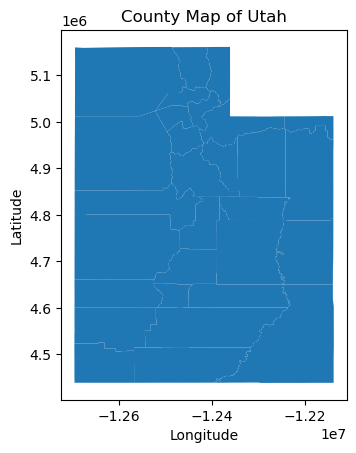

In [18]:
# Plot County Map
gdf.plot()
plt.title("County Map of Utah")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Customize Map Appearance
Customize the appearance of the map, including setting titles, labels, and colors.

/var/folders/qc/qbd7drx950qdz45tzm_l106w0000gn/T/ipykernel_93822/4053715755.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf['entry_count'].fillna(0, inplace=True)


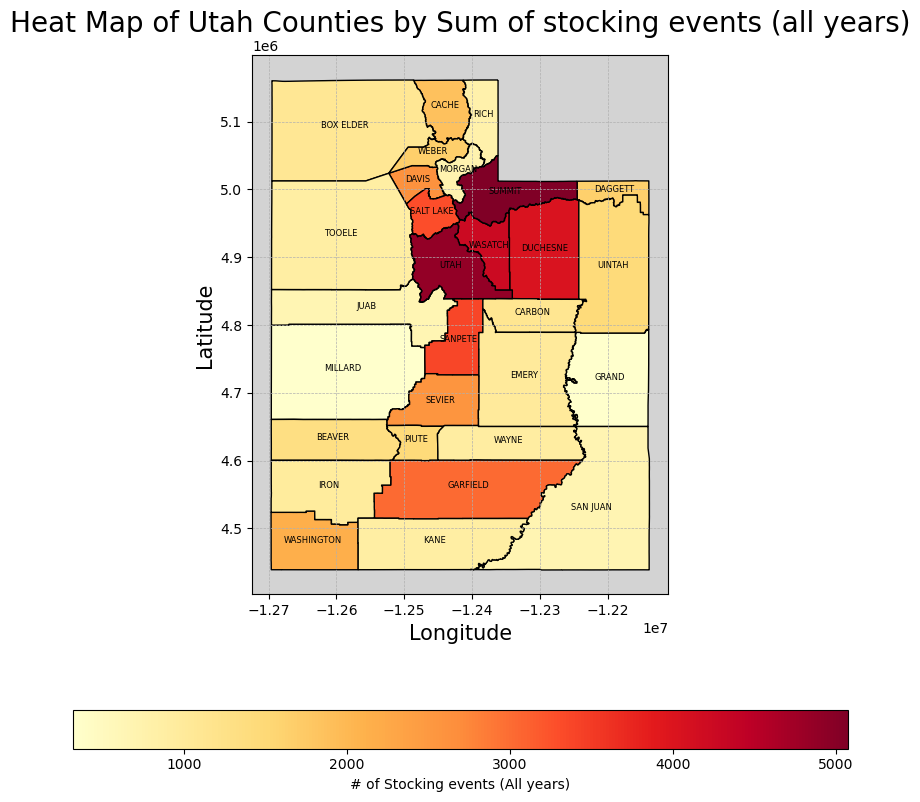

In [19]:
csv_data = pd.read_csv('Stocking_All_Years.csv')

# Count the number of entries per county
county_counts = csv_data['County'].value_counts().reset_index()
county_counts.columns = ['NAME', 'entry_count']  # Rename columns for merging

# Load the shapefile for Utah counties
gdf = gpd.read_file('Counties.shp')

# Merge the county counts with the GeoDataFrame based on the 'NAME' column
gdf = gdf.merge(county_counts, on='NAME', how='left')

# Replace NaN values (counties with no entries in the CSV) with 0
gdf['entry_count'].fillna(0, inplace=True)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the counties with a color scale based on 'entry_count'
gdf.plot(ax=ax, column='entry_count', cmap='YlOrRd', edgecolor='black', legend=True,
         legend_kwds={'label': "# of Stocking events (All years)", 'orientation': "horizontal"})

# Add county names
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['NAME']):
    ax.annotate(label, xy=(x, y), fontsize=6, ha='center')

# Set titles and labels
ax.set_title("Heat Map of Utah Counties by Sum of stocking events (all years)", fontsize=20)
ax.set_xlabel("Longitude", fontsize=15)
ax.set_ylabel("Latitude", fontsize=15)

# Customize grid and background
ax.grid(True, linestyle='--', linewidth=0.5)
ax.set_facecolor('lightgrey')

# Show the plot
plt.show()

/var/folders/qc/qbd7drx950qdz45tzm_l106w0000gn/T/ipykernel_93822/2326856761.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf['entry_count'].fillna(0, inplace=True)


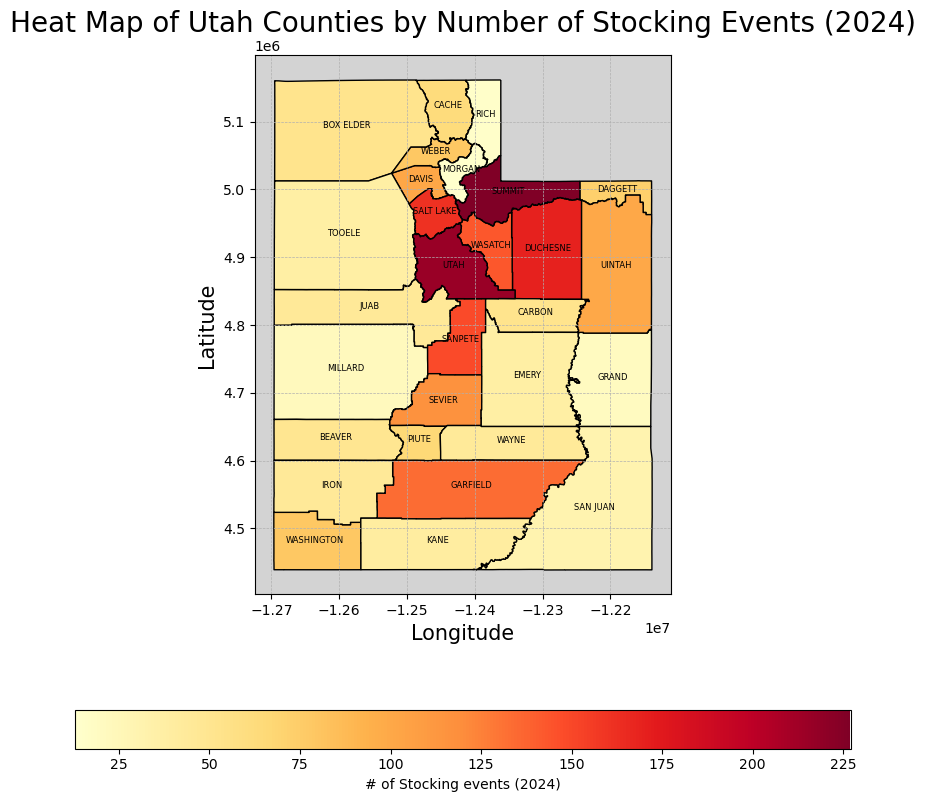

In [20]:


# Load the CSV file (replace 'Stocking_All_Years.csv' with the actual file path)
csv_data = pd.read_csv('Stocking_All_Years.csv')

# Convert the 'Date Stocked' column to datetime format
csv_data['Date Stocked'] = pd.to_datetime(csv_data['Date Stocked'], format='%m/%d/%Y')

# Filter the data for the year 2024
csv_data_2024 = csv_data[csv_data['Date Stocked'].dt.year == 2024]

# Count the number of entries per county in 2024
county_counts_2024 = csv_data_2024['County'].value_counts().reset_index()
county_counts_2024.columns = ['NAME', 'entry_count']  # Rename columns for merging

# Load the shapefile for Utah counties
gdf = gpd.read_file('Counties.shp')

# Merge the county counts for 2024 with the GeoDataFrame based on the 'NAME' column
gdf = gdf.merge(county_counts_2024, on='NAME', how='left')

# Replace NaN values (counties with no entries in the CSV) with 0
gdf['entry_count'].fillna(0, inplace=True)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the counties with a color scale based on 'entry_count'
gdf.plot(ax=ax, column='entry_count', cmap='YlOrRd', edgecolor='black', legend=True,
         legend_kwds={'label': "# of Stocking events (2024)", 'orientation': "horizontal"})

# Add county names
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['NAME']):
    ax.annotate(label, xy=(x, y), fontsize=6, ha='center')

# Set titles and labels
ax.set_title("Heat Map of Utah Counties by Number of Stocking Events (2024)", fontsize=20)
ax.set_xlabel("Longitude", fontsize=15)
ax.set_ylabel("Latitude", fontsize=15)

# Customize grid and background
ax.grid(True, linestyle='--', linewidth=0.5)
ax.set_facecolor('lightgrey')

# Show the plot
plt.show()


In [22]:
# Load the CSV file (replace with the correct path to your file)
csv_data = pd.read_csv('Stocking_All_Years.csv')

# Convert 'Date Stocked' to datetime format
csv_data['Date Stocked'] = pd.to_datetime(csv_data['Date Stocked'], format='%m/%d/%Y')

# Create a list of unique years in the data
years = sorted(csv_data['Date Stocked'].dt.year.unique())

# Create an initial map centered on Utah
def create_map(year):
    # Filter the data for the selected year
    filtered_data = csv_data[csv_data['Date Stocked'].dt.year == year]
    
    # Create a new map for the selected year
    year_map = folium.Map(location=[40.3, -111.7], zoom_start=7)
    
    # Group by county and count the number of events per county
    county_counts = filtered_data['County'].value_counts().reset_index()
    county_counts.columns = ['County', 'entry_count']
    
    # Load the shapefile for Utah counties
    gdf = gpd.read_file('Counties.shp')

    # Merge the county counts with the GeoDataFrame based on the 'County' column
    gdf = gdf.merge(county_counts, left_on='NAME', right_on='County', how='left')

    # Replace NaN values (counties with no entries for the selected year) with 0
    gdf['entry_count'].fillna(0, inplace=True)

    # Plot the counties with a color scale based on 'entry_count'
    folium.Choropleth(
        geo_data=gdf,
        data=gdf,
        columns=['NAME', 'entry_count'],
        key_on='feature.properties.NAME',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Number of Stocking Events'
    ).add_to(year_map)
    
    # Add county names to the map
    for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['NAME']):
        folium.Marker(
            location=[y, x], 
            popup=label, 
            icon=folium.Icon(icon='cloud')
        ).add_to(year_map)
    
    return year_map

# Create the slider widget for selecting the year
year_slider = widgets.IntSlider(
    value=2024,
    min=min(years),
    max=max(years),
    step=1,
    description='Year:',
    continuous_update=False
)

# Create an output widget to display the map
output = widgets.Output()

# Function to update the map based on the selected year
def on_year_change(change):
    with output:
        # Clear the previous output
        output.clear_output(wait=True)
        
        # Display the updated map
        updated_map = create_map(change.new)
        display(updated_map)

# Link the slider to the update function
year_slider.observe(on_year_change, names='value')

# Display the slider and the output widget
display(year_slider, output)

# Initially display the map for the first year
with output:
    initial_map = create_map(year_slider.value)
    display(initial_map)


IntSlider(value=2024, continuous_update=False, description='Year:', max=2024, min=2002)

Output()